# Time- and zonal- mean layer thicknesses and meridional volume transport

This notebook is converted from plt_h_vh.py, which visualizes the time- and zonal-mean layer thicknesses (h) and meridional volume transport (vh) in the density space.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
data = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v38/output028/prog_rho.nc','r')

In [3]:
xq  = data.variables['xq'][:]        # uh
yh  = data.variables['yh'][:]        # uh  ,h
xh  = data.variables['xh'][:]        #   vh,h
yq  = data.variables['yq'][:]        #   vh
rho = data.variables['02_l'][:] 

In [4]:
h4  = data.variables['h'][:,:,:,:]
vh4 = data.variables['vh'][:,:,:,:]
h4  = h4.filled(np.nan)
vh4 = vh4.filled(np.nan)

In [5]:
# time-mean
h3  = np.nanmean(h4,axis=0)
vh3 = np.nanmean(vh4,axis=0)

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:607: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [6]:
# zonal-sum for transport, zonal-mean for layer thicknesses
h2  = np.nanmean(h3,axis=-1)
vh2 = np.nansum(vh3,axis=-1)

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)


In [7]:
h2[h2<2.5]=np.nan
vh2[np.isnan(h2)==True]=np.nan

/projects/access/apps/pythonlib/ipython/3.1.0/ipython-3.1.0-py2.7.egg/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [8]:
h_sum = np.nansum(h2,axis=0)
print h_sum

[   48.59896851   148.94367981   248.39468384   336.74591064   434.78860474
   538.53924561   640.88671875   745.81896973   851.36694336   966.87750244
  1094.08251953  1217.99731445  1351.53601074  1512.81091309  1688.67236328
  2016.1270752   2352.17504883  2430.14379883  2546.11132812  2775.84765625
  2656.98120117  2570.47387695  2693.15942383  2810.92333984  2938.77783203
  3017.18310547  2986.93896484  3039.60302734  3101.50805664  3219.19189453
  3347.37426758  3474.9050293   3622.51538086  3817.0168457   4040.66821289
  4173.86230469  4320.22119141  4443.74072266  4529.64208984  4571.53027344
  4580.29931641  4544.97460938  4538.87207031  4540.01904297  4538.24853516
  4535.625       4530.72265625  4523.90771484  4520.99267578  4522.01855469
  4508.35205078  4513.85107422  4506.33789062  4513.87304688  4504.22851562
  4498.42675781  4499.66601562  4506.31005859  4493.48535156  4489.26074219
  4484.67236328  4476.74462891  4470.93359375  4465.01855469  4457.359375
  4453.7241210

In [9]:
%matplotlib inline

Plot layer thicknesses:

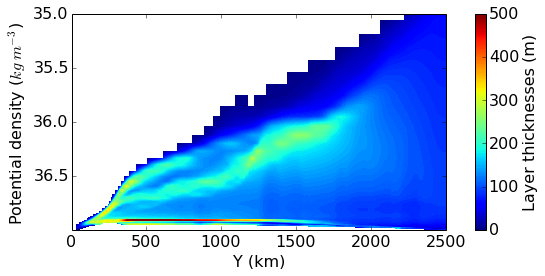

In [10]:
plt.figure(1,figsize=(8,5))

h_level = np.arange(0,500+5,5)
h_ticks = np.arange(0,500+100,100)

pc = plt.contourf(yh,rho,h2,cmap=plt.cm.jet,levels=h_level)
cb = plt.colorbar(pc,ticks=h_ticks)
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([1035.0,1037.0])
plt.gca().set_yticks(np.arange(1035.0,1037.0 + 0.5,0.5))
plt.gca().set_yticklabels(['35.0','35.5','36.0','36.5'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Layer thicknesses (m)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Potential density ($kg\ m^{-3}$)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v38_h_rho_y50.png',dpi=600)

plt.show()

Plot volume transport:

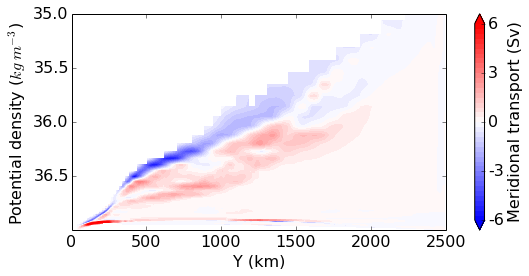

In [11]:
plt.figure(2,figsize=(8,5))

vh_level = np.arange(-6.0e+6,6.0e+6+0.3e+6,0.3e+6)
vh_ticks = np.arange(-6.0e+6,6.0e+6+3e+6,3e+6)

pc = plt.contourf(yq,rho,vh2,cmap=plt.cm.bwr,levels=vh_level,extend='both')
cb = plt.colorbar(pc,ticks=vh_ticks)
plt.gca().set_ylim([1035.0,1037.0])
plt.gca().set_yticks(np.arange(1035.0,1037.0 + 0.5,0.5))
plt.gca().set_yticklabels(['35.0','35.5','36.0','36.5'])
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.ax.set_yticklabels(['-6','-3','0','3','6'])
cb.set_label('Meridional transport (Sv)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Potential density ($kg\ m^{-3}$)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v38_vh_rho_y50.png',dpi=600)

plt.show()